In [36]:
#! pip install yfinance
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

import numpy as np
import pandas as pd
#define the ticker symbol
tickerSymbol = '^IXIC'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
df = tickerData.history(period='1d', start='2012-1-1', end='2020-10-27')

#see your data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,2657.389893,2665.899902,2641.979980,2648.719971,1636850000,0,0
2012-01-04,2639.899902,2653.179932,2627.229980,2648.360107,1670530000,0,0
2012-01-05,2642.570068,2673.560059,2631.229980,2669.860107,1836410000,0,0
2012-01-06,2671.169922,2682.120117,2658.830078,2674.219971,1683090000,0,0
2012-01-09,2682.979980,2683.780029,2662.959961,2676.560059,1768080000,0,0
...,...,...,...,...,...,...,...
2020-10-20,11531.830078,11632.889648,11471.230469,11516.490234,3483200000,0,0
2020-10-21,11530.389648,11613.790039,11476.080078,11484.690430,3445520000,0,0
2020-10-22,11526.969727,11548.769531,11369.290039,11506.009766,3414590000,0,0




Simple return: $R_t=\frac{P_t - P_{t-1}}{P_{t-1}}$

Log-return: $r_t = \log\left(\frac{P_t}{P_{t-1}}\right)=\log{P_t}-\log{P_{t-1}}$

In [38]:
close = df["Close"]

simple_return = close.pct_change()
log_return = np.log(1+simple_return)


Populating the interactive namespace from numpy and matplotlib


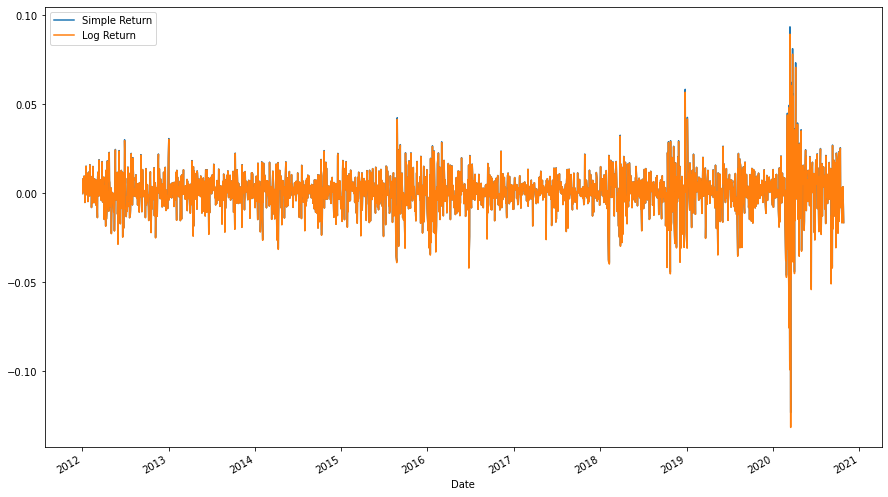

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

import matplotlib.lines as mlines

pylab.rcParams['figure.figsize'] = (15, 9)
simple_return.plot(label = 'Simple Return')# Plot the lsimple return
log_return.plot(label = 'Log Return') # Plot the logreturn
plt.legend()


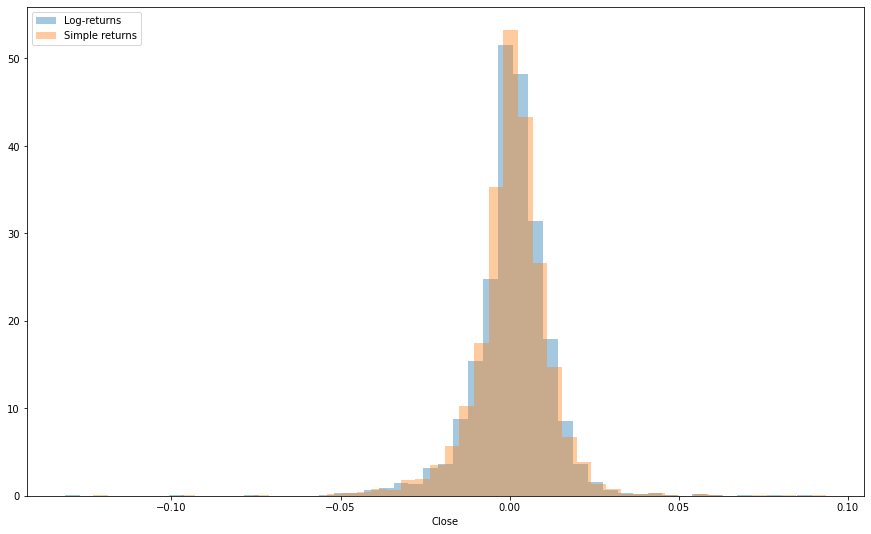

In [40]:
import seaborn as sns

# histogram
sns.distplot(log_return, kde=False, norm_hist=True,label='Log-returns') 
sns.distplot(simple_return, kde=False, norm_hist=True, label='Simple returns')  

legend(loc='upper left');

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

In [41]:
df2=log_return
df2

Date
2012-01-03         NaN
2012-01-04   -0.000136
2012-01-05    0.008085
2012-01-06    0.001632
2012-01-09    0.000875
                ...   
2020-10-20    0.003271
2020-10-21   -0.002765
2020-10-22    0.001855
2020-10-23    0.003667
2020-10-26   -0.016531
Name: Close, Length: 2219, dtype: float64

In [42]:
df_complet = pd.concat([df,df2],axis=1)
df_complet

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close
Date,,,,,,,,
2012-01-03,2657.389893,2665.899902,2641.979980,2648.719971,1636850000,0,0,NaN
2012-01-04,2639.899902,2653.179932,2627.229980,2648.360107,1670530000,0,0,-0.000136
2012-01-05,2642.570068,2673.560059,2631.229980,2669.860107,1836410000,0,0,0.008085
2012-01-06,2671.169922,2682.120117,2658.830078,2674.219971,1683090000,0,0,0.001632
2012-01-09,2682.979980,2683.780029,2662.959961,2676.560059,1768080000,0,0,0.000875
...,...,...,...,...,...,...,...,...
2020-10-20,11531.830078,11632.889648,11471.230469,11516.490234,3483200000,0,0,0.003271
2020-10-21,11530.389648,11613.790039,11476.080078,11484.690430,3445520000,0,0,-0.002765
2020-10-22,11526.969727,11548.769531,11369.290039,11506.009766,3414590000,0,0,0.001855


In [43]:
df_complet.to_csv('Log_Return_IXIC.csv')
df_complet

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close
Date,,,,,,,,
2012-01-03,2657.389893,2665.899902,2641.979980,2648.719971,1636850000,0,0,NaN
2012-01-04,2639.899902,2653.179932,2627.229980,2648.360107,1670530000,0,0,-0.000136
2012-01-05,2642.570068,2673.560059,2631.229980,2669.860107,1836410000,0,0,0.008085
2012-01-06,2671.169922,2682.120117,2658.830078,2674.219971,1683090000,0,0,0.001632
2012-01-09,2682.979980,2683.780029,2662.959961,2676.560059,1768080000,0,0,0.000875
...,...,...,...,...,...,...,...,...
2020-10-20,11531.830078,11632.889648,11471.230469,11516.490234,3483200000,0,0,0.003271
2020-10-21,11530.389648,11613.790039,11476.080078,11484.690430,3445520000,0,0,-0.002765
2020-10-22,11526.969727,11548.769531,11369.290039,11506.009766,3414590000,0,0,0.001855


In [44]:
corelatie = pd.read_csv('Medie_zi_close.csv')
corelatie

,Date,Log return,Log return analysis,Intervals,Sentiment,Close,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1/3/2012,0.0000,Negative,Stagnant,0.067441,2648.719971,NaN,NaN,NaN
1,1/4/2012,-0.0001,Negative,Stagnant,0.039590,2648.360107,NaN,NaN,NaN
2,1/5/2012,0.0081,Positive,Stagnant,0.044861,2669.860107,NaN,NaN,NaN
3,1/6/2012,0.0016,Positive,Stagnant,0.030894,2674.219971,NaN,NaN,NaN
4,1/9/2012,0.0009,Positive,Stagnant,0.051383,2676.560059,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2211,10/20/2020,0.0033,Positive,Stagnant,0.076823,11516.490230,NaN,NaN,NaN
2212,10/21/2020,-0.0028,Negative,Stagnant,0.082956,11484.690430,NaN,NaN,NaN
2213,10/22/2020,0.0019,Positive,Stagnant,0.070976,11506.009770,NaN,NaN,NaN
2214,10/23/2020,0.0037,Positive,Stagnant,0.070938,11548.280270,NaN,NaN,NaN


In [45]:
corelatie['Sentiment'].corr(corelatie['Close'])

0.501604732956882

<AxesSubplot:xlabel='Sentiment', ylabel='Close'>

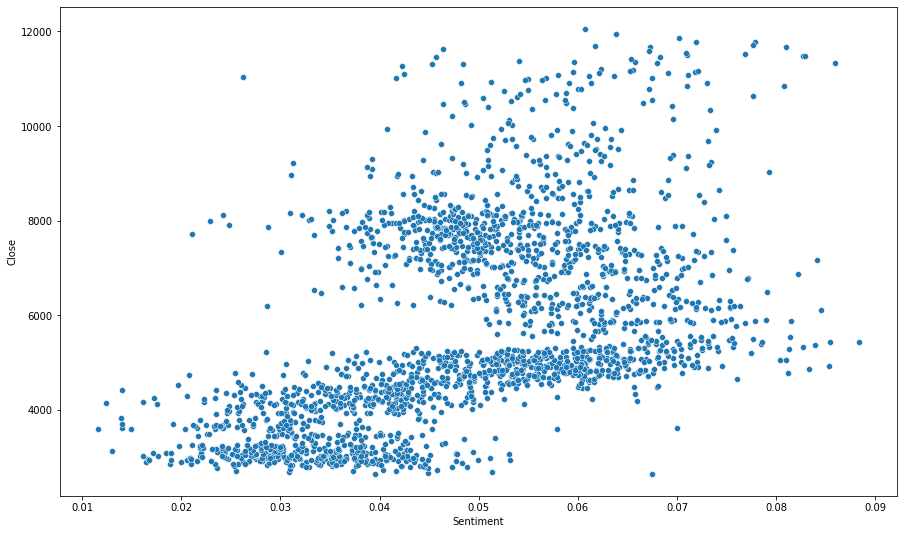

In [46]:
import seaborn as sns
sns.scatterplot(x="Sentiment", y="Close", data=corelatie)

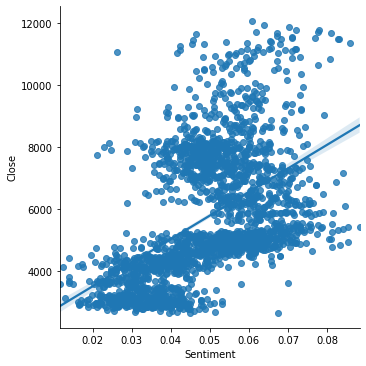

In [47]:
sns.lmplot(x="Sentiment", y="Close", data=corelatie)

In [10]:
df = pd.read_csv("Medie_zi_close.csv")
df['Date'] = df.loc[:,'Date'].astype('datetime64[ns]')
df = df[['Date','Close']]
df.set_index('Date',inplace=True)

In [11]:
df_Monthly_Price = df.resample('M').mean()
print(df_Monthly_Price)

                   Close
Date                    
2012-01-31   2743.795007
2012-02-29   2928.980493
2012-03-31   3035.915916
2012-04-30   3035.101514
2012-05-31   2900.409113
...                  ...
2020-06-30   9839.971325
2020-07-31  10499.862703
2020-08-31  11212.290504
2020-09-30  11088.679966
2020-10-31  11480.323012

[106 rows x 1 columns]


In [12]:
price = df_Monthly_Price["Close"]

simple_return = price.pct_change()

log_return = np.log(1+simple_return)


Populating the interactive namespace from numpy and matplotlib


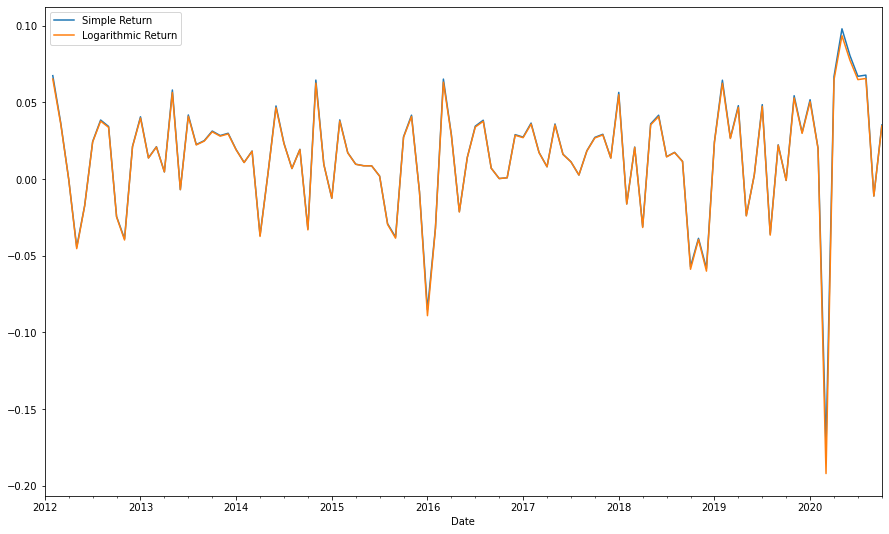

In [13]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

simple_return.plot(label = 'Simple Return')# Plot the lsimple return
log_return.plot(label = 'Logarithmic Return') # Plot the logreturn
plt.legend()